In [44]:
import sympy as sp
import numpy as np
import math

import matplotlib.pyplot as plt

#  init state = |0> state
init_state = sp.Matrix([[1], [0] ])
print('Initial state:', init_state)


# density matrix
def density_matrix(state):
    #  convert np state -> sp
    state = np.matrix(state)
    result = state @ state.conj().T
    
    # convert np.result -> sp
    result = sp.Matrix(result)
    return result
print("density matrix init: ", density_matrix(init_state),"\n")    


#  Hadamard
def Hadamard(rho):
    
    # convert rho to sp
    rho = np.matrix(rho)
    Hadamard_matrix = (1/np.sqrt(2))*np.matrix([ [1, 1], [1, -1] ])
    
    rho_after_hadamard = Hadamard_matrix @ rho @ Hadamard_matrix.conj().T
    
    # np -> sp
    rho_after_hadamard = sp.Matrix(rho_after_hadamard)
    return rho_after_hadamard 


# Evolve for time
def Time_evo_rho(rho, t, w):
    #  type transformation
    rho = sp.Matrix(rho)
    
    I_x = sp.Matrix([ [0,1], [1, 0]]) / 2
    I_y = sp.Matrix([ [0, -1.j], [1.j, 0]]) / 2
    I_z = sp.Matrix([ [1,0], [0, -1]]) / 2
    
    result = sp.exp(1.j * w*t * I_z)  @ rho @ sp.exp(-1.j * w*t * I_z)
    
    return result

# Hadamard( np.array([ [1, 0], [0, 0] ]))
Time_evo_rho( np.array([ [0.5, 0.5], [0.5, 0.5]]), 1, 1)

Initial state: Matrix([[1], [0]])
density matrix init:  Matrix([[1, 0], [0, 0]]) 



Matrix([
[            0.5, 0.5*exp(1.0*I)],
[0.5*exp(-1.0*I),            0.5]])

In [45]:
# ==Calculation==
def Oper(t, w):
    # calculate rho_0
    rho_0 = density_matrix(init_state)
    
    # applying Hadamard
    rho_Hadamard = Hadamard(rho_0)
    # print("1st Hadamard applied: ", rho_Hadamard,"\n")
    
    # time evolve 
    rho_t = Time_evo_rho(rho_Hadamard, t, w)
    # print("time evolion of rho: ", rho_t, "\n")
    
    # applying Hadamard
    rho_final = Hadamard(rho_t)
    # print("rho_final: ", rho_final, "\n")
    
    # return rho_final
    # O = sp.Matrix([ [1, 0], [0, 0] ]) - sp.Matrix([ [0, 0], [0, 1] ])
    # Observable to z-directions
    O = sp.Matrix([ [0, 0], [0, 1] ]) - sp.Matrix([ [1, 0], [0, 0] ])
    #  |1><1| - |0><0|
    
    return sp.trace( rho_final * O )

# test func for t, w = 1, 1
t_variable, w_variable = 1, 1
Oper(t_variable, w_variable )

-0.5*exp(1.0*I) - 0.5*exp(-1.0*I)

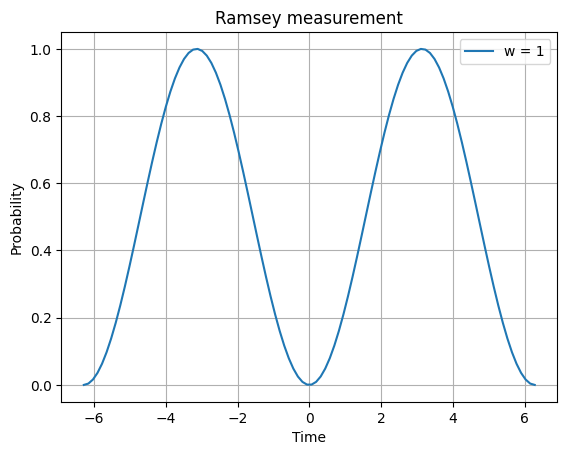

In [46]:
t_variable = np.linspace(-2*np.pi, 2*np.pi, 100)
t_sym = sp.Matrix( t_variable ) 

w_in = 0.5

measurements = []

for i in range(len(t_sym)):
    # 1/2 [1 - cos(w_0*t)]
    measurements.append( 1 - abs(Oper(t_sym[i,0], w_in))**2 )

    # append circuit(thetas) as elements of arrary(measurements)
    
fig, ax = plt.subplots()
ax.plot(t_variable, measurements, label = 'w = 1')
plt.title('Ramsey measurement')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid()

* Procedure

- step1: find rho for |0> state
rho_init = [[1],[0]]*[1, 0]

- step2: apply hadamard gate 
H @ rho_init @ H.conj().T

- step3: evolve for t
rho_evolve = e^(i*wt*(1/2)*pauli_z) @ rho_init @ e^(-i*wt*(1/2)*pauli_z)

- step4: apply hadamard gate
rho_final = H @ rho_evolve @ H.conj().T

- step5: trace
measurement = tr(rho_final * (|1><1| - |0><0|) )

- step6: transition probability
p = 1 - |<0|alpha>|^2
= 1 - abs(measurement)